# NOTEBOOK NAME

Author  : David Darigan

ID      : C00263218

## Process

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modelling
5. Evaluation
6. Goto 1

## CHANGELOG

The changes are listed in descending order (the most-recent change will be at the bottom)

### Change #1

- Use dataset 'dataset/mushroom_1.csv'
- Use KNearestNeighbour with neighbours set to 3
- Target variable is the mushroom 'family'
- Label encode categorial variables (note: number collections such as Int Arrays are not considered numerical)
- Scale the data to fit the transform

<img src="img/describe.png" alt="describe" width=500>
<br>
<img src="img/heatmap.png" alt="correlation heatmap" width=500>
<br>
<img src="img/scores.png" alt="scores" width=500>
<br>
<img src="img/confusionmatrix.png" alt="cm" width=500>
<br>

Observations

- 23 Dimensions of data is a lot
- Major correlation for family only exists in some dimensions (veil color, veil type, habitat and to some extent spore-print-color)
- Accuracy is low, R2 Score is high, and mean-squared error is incredibly high. Model is poorly suited
- Only 13 out of 23 family names are being tested, presumably these were removed during scaling 

### Change #2

- Removed Scaling

<img src="img/scores2.png" width=500>
<br>
<img src="img/confusion2.png" width=500>

Observations

- Scores are significantly worse
- Did not solve impartial confusion matrix

### Change #3

- Reintroduce scalers
- Increase test sample size

<img src="img/confusion3.png" width=500>

Observations

- Additional family classes have appeared
- Preferably would like to see all classes appear

### Change #4

- Increase test size to 0.6

<img src="img/scores3.png" width=500>
<br>
<img src="img/confusion4.png" width=500>

Observations

- Scores have improved but are still poor
- All class names now appear in test

### Change #5

- Selected the highest family correlation features (veil-color, veil-type, spore-print-color & habitat)

<img src="img/scores5.png" width=500>
<br>
<img src="img/confusion5.png" width=500>
<br>

Observations

- R2 score has degraded
- Mean Squared Error has increased
- Some family classes are missing from confusion matrix
- Surprised the limited high-correlation dimensions are performing poorly

### Change #6

- Investigated using different algorithms (ball, kdtree, uniform) and neighbours (1, 3, 7, 33)

<img src="img/scores6.png" width=500>
<br>

Observations

- No R2 score has improved beyond using neighbour=1 and default algorithm

### Change #7

[CONTENT]

### Change #8

[CONTENT]

### Change #9

[CONTENT]

### Change #10

[CONTENT]

## CODE

### Dependencies

In [25]:
%pip install tabulate
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install tensorflow
%pip install pandas


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1. Business Understanding

[BLURB]

### 2. Data Understanding

In [71]:
# Data Collection
import pandas as pd

data = pd.read_csv("datasets/mushroom_1.csv", delimiter=";")
family_names = data["family"].unique()

#### 2.1 Descriptive Statistics

In [72]:
data.describe()



,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
count,173,173,173,173,173,133,173,173,145,102,...,27,65,173,9,21,173,166,18,173,173
unique,23,173,2,51,27,40,67,2,8,3,...,5,14,41,1,7,2,13,8,21,10
top,Tricholoma Family,Fly Agaric,p,"[2, 5]",[x],[y],[n],[f],[a],[c],...,[s],[s],[w],[u],[w],[f],[f],[k],[d],"[u, a]"
freq,43,1,96,16,48,14,38,143,32,70,...,9,15,57,9,15,130,137,5,104,106


#### 2.2 Data Visualization

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Data Preparation

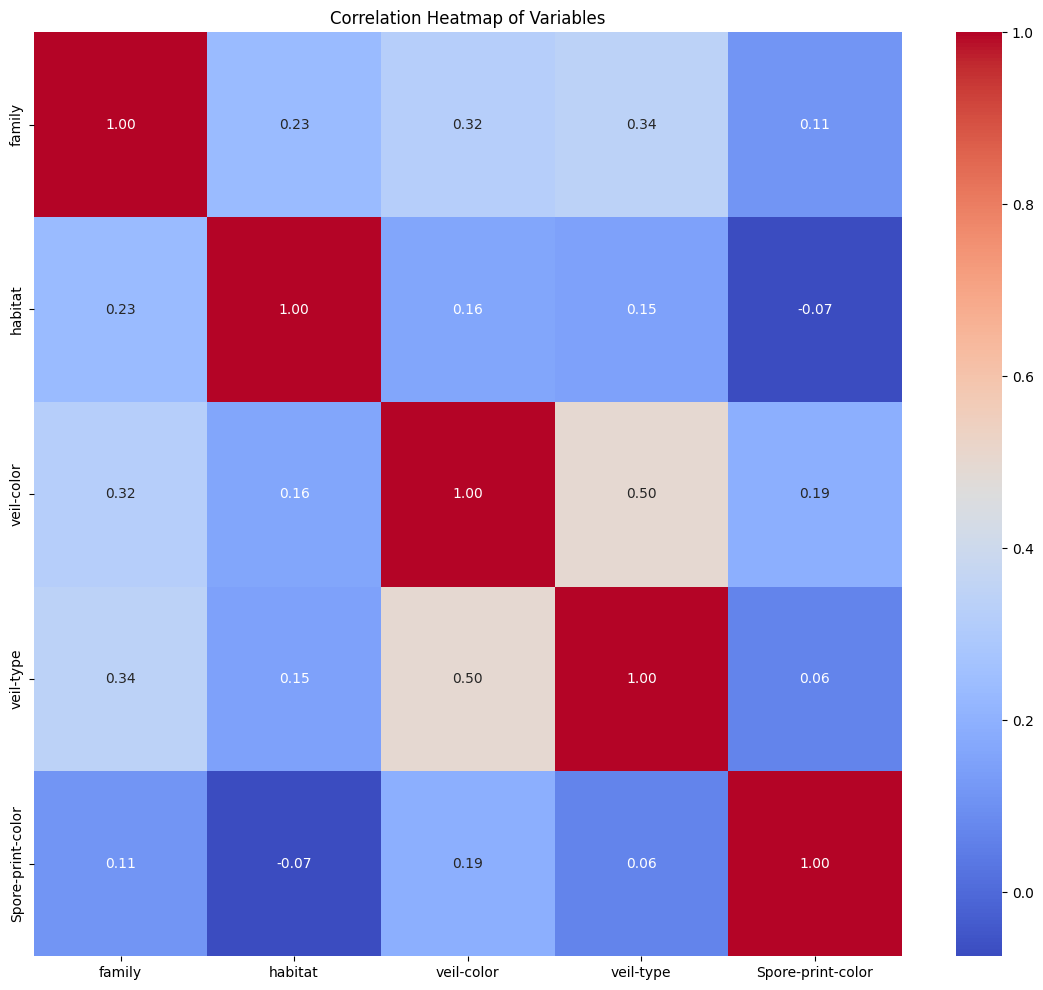

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

family_names = data["family"].unique()
data = data[["family", "habitat", "veil-color", "veil-type", "Spore-print-color"]]

# Label encoding the categorial variables
encoders = {}
for column in data.columns:
    encoders[column] = LabelEncoder()
    data[column] = encoders[column].fit_transform(data[column])

correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

# # Split the data into features and target
X = data.drop('family', axis=1)
y = data['family']

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


# # Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. Modelling

In [113]:
# Select Modeling Technique
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Implement the KNN algorithm
knn_model = KNeighborsClassifier(n_neighbors=1)

# Train the KNN model
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)



### 5 Evaluation

##### 5.1 Score Table

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# # Compute cross-validated scores
accuracy_scores = accuracy_score(y_true=y_test, y_pred=y_pred)
precision_scores = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall_scores = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1_scores = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
r2_scores = r2_score(y_true=y_test, y_pred=y_pred)
mean_squared_errors = mean_squared_error(y_true=y_test, y_pred=y_pred)

# # Tabulate the scores
headers = ['Metric', 'Score']
scores = [
    ['Accuracy', accuracy_scores],
    ['Precision', precision_scores],
    ['Recall', recall_scores],
    ['F1 Score', f1_scores],
    ['R2 Score', r2_scores],
    ['Mean Squared Error', mean_squared_errors]
]

# # Print the table
print(tabulate(scores, headers=headers))

Accuracy: 0.28846153846153844
Metric                  Score
------------------  ---------
Accuracy             0.288462
Precision            0.302906
Recall               0.288462
F1 Score             0.224315
R2 Score            -0.290268
Mean Squared Error  76.0865


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Confusion Matrix

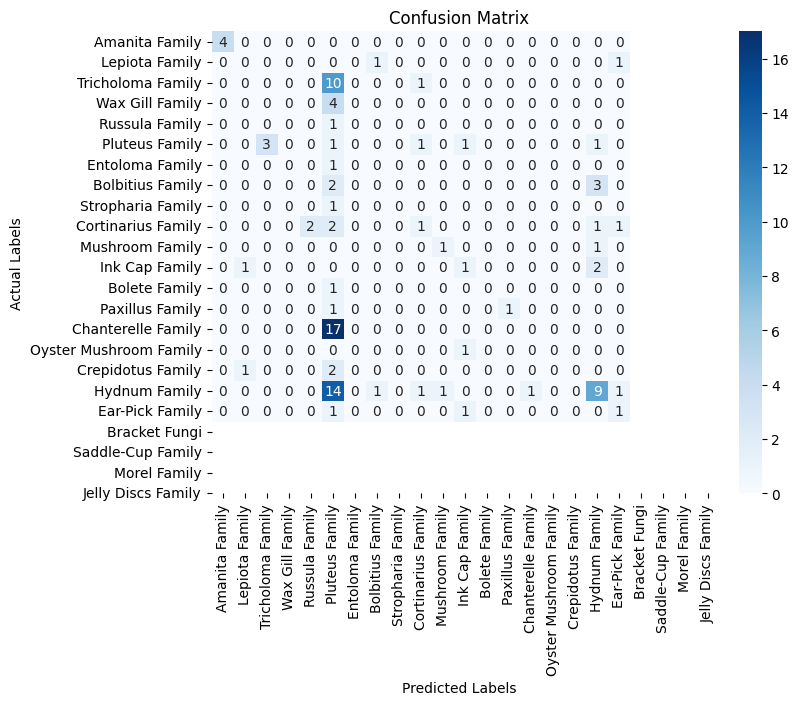

In [110]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

#  Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=family_names, yticklabels=family_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


### Deployment

In [17]:
import joblib

# Pickling The Model
# joblib.dump(model, "model.pkl")